# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
import glob
import os
import math
import warnings
import matplotlib
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=30)
font = {'size'   : 35,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

# Loading Data 

In [3]:
paths = glob.glob(os.path.join(r"D:\Global_Petrophysics_ML\Mehar\all","*.csv")

In [4]:
Data = [pd.read_csv(i) for i in paths]

# Zamzama-3

In [5]:
_3 = Data[0].copy()

In [6]:
a = _3
min1 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].max()

min3 = a[a["Formation"]=="Pab Formation"]["DEPTH"].min()
min4 = a[a["Formation"]=="Pab Formation"]["DEPTH"].max()
tops = [(min1+min2)/2,(min3+min4)/2]
forms = ["Khadro","Pab"]

In [7]:
_3 = _3[_3["GR"].notnull()].reset_index(drop=True)
_3

,DEPTH,GR,RES:1,RES:2,RHOB:1,RHOB:2,RES:3,DT,DPTM,P-IMP,...,UNKNOWN:1,SDT:2,RHOB:4,UNKNOWN:2,Formation,BS,CALI,RHOB,RES,SW
0,3228.1367,83.1622,10.6895,6.6261,0.1871,2.4676,1.2386,65.6560,NaN,11455.5332,...,NaN,NaN,NaN,NaN,Khadro Sand,12.25,16.5980,2.4855,8.5903,NaN
1,3228.2893,62.8111,34.7267,11.9205,0.1678,2.4131,1.4626,58.9494,NaN,12477.0195,...,NaN,NaN,NaN,NaN,Khadro Sand,12.25,17.6836,2.4106,19.1217,NaN
2,3228.4417,45.5917,81.9959,20.0214,0.1575,2.3753,1.4324,55.9626,NaN,12937.0576,...,NaN,NaN,NaN,NaN,Khadro Sand,12.25,18.3453,2.3728,88.9430,NaN
3,3228.5940,39.5101,86.6740,20.8122,0.1668,2.3670,1.7532,55.0133,NaN,13114.3125,...,NaN,NaN,NaN,NaN,Khadro Sand,12.25,18.8337,2.3673,86.3576,NaN
4,3228.7463,37.4835,88.1799,22.7223,0.1661,2.3690,1.1226,50.8921,NaN,14188.2764,...,NaN,NaN,NaN,NaN,Khadro Sand,12.25,19.0969,2.3635,89.8995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,3576.3708,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,Pab Formation,8.50,10.3418,2.0900,28.0400,NaN
2286,3576.5232,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,Pab Formation,8.50,10.3418,2.1900,21.7000,NaN
2287,3576.6755,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,Pab Formation,8.50,10.3418,2.3100,38.3100,NaN
2288,3576.8279,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,Pab Formation,8.50,10.3418,2.4200,47.4000,NaN


In [8]:
a = _3.copy()

In [9]:
m = int(a["GR"].max())
d = []
for i in a["GR"]:
    z = np.nan*(np.ones(m))
    z[:int(i)+1] = i
    z = z.reshape(1,-1)
    d.append(z)
gr = pd.DataFrame(np.concatenate(d))
gr["data"] = a["GR"]

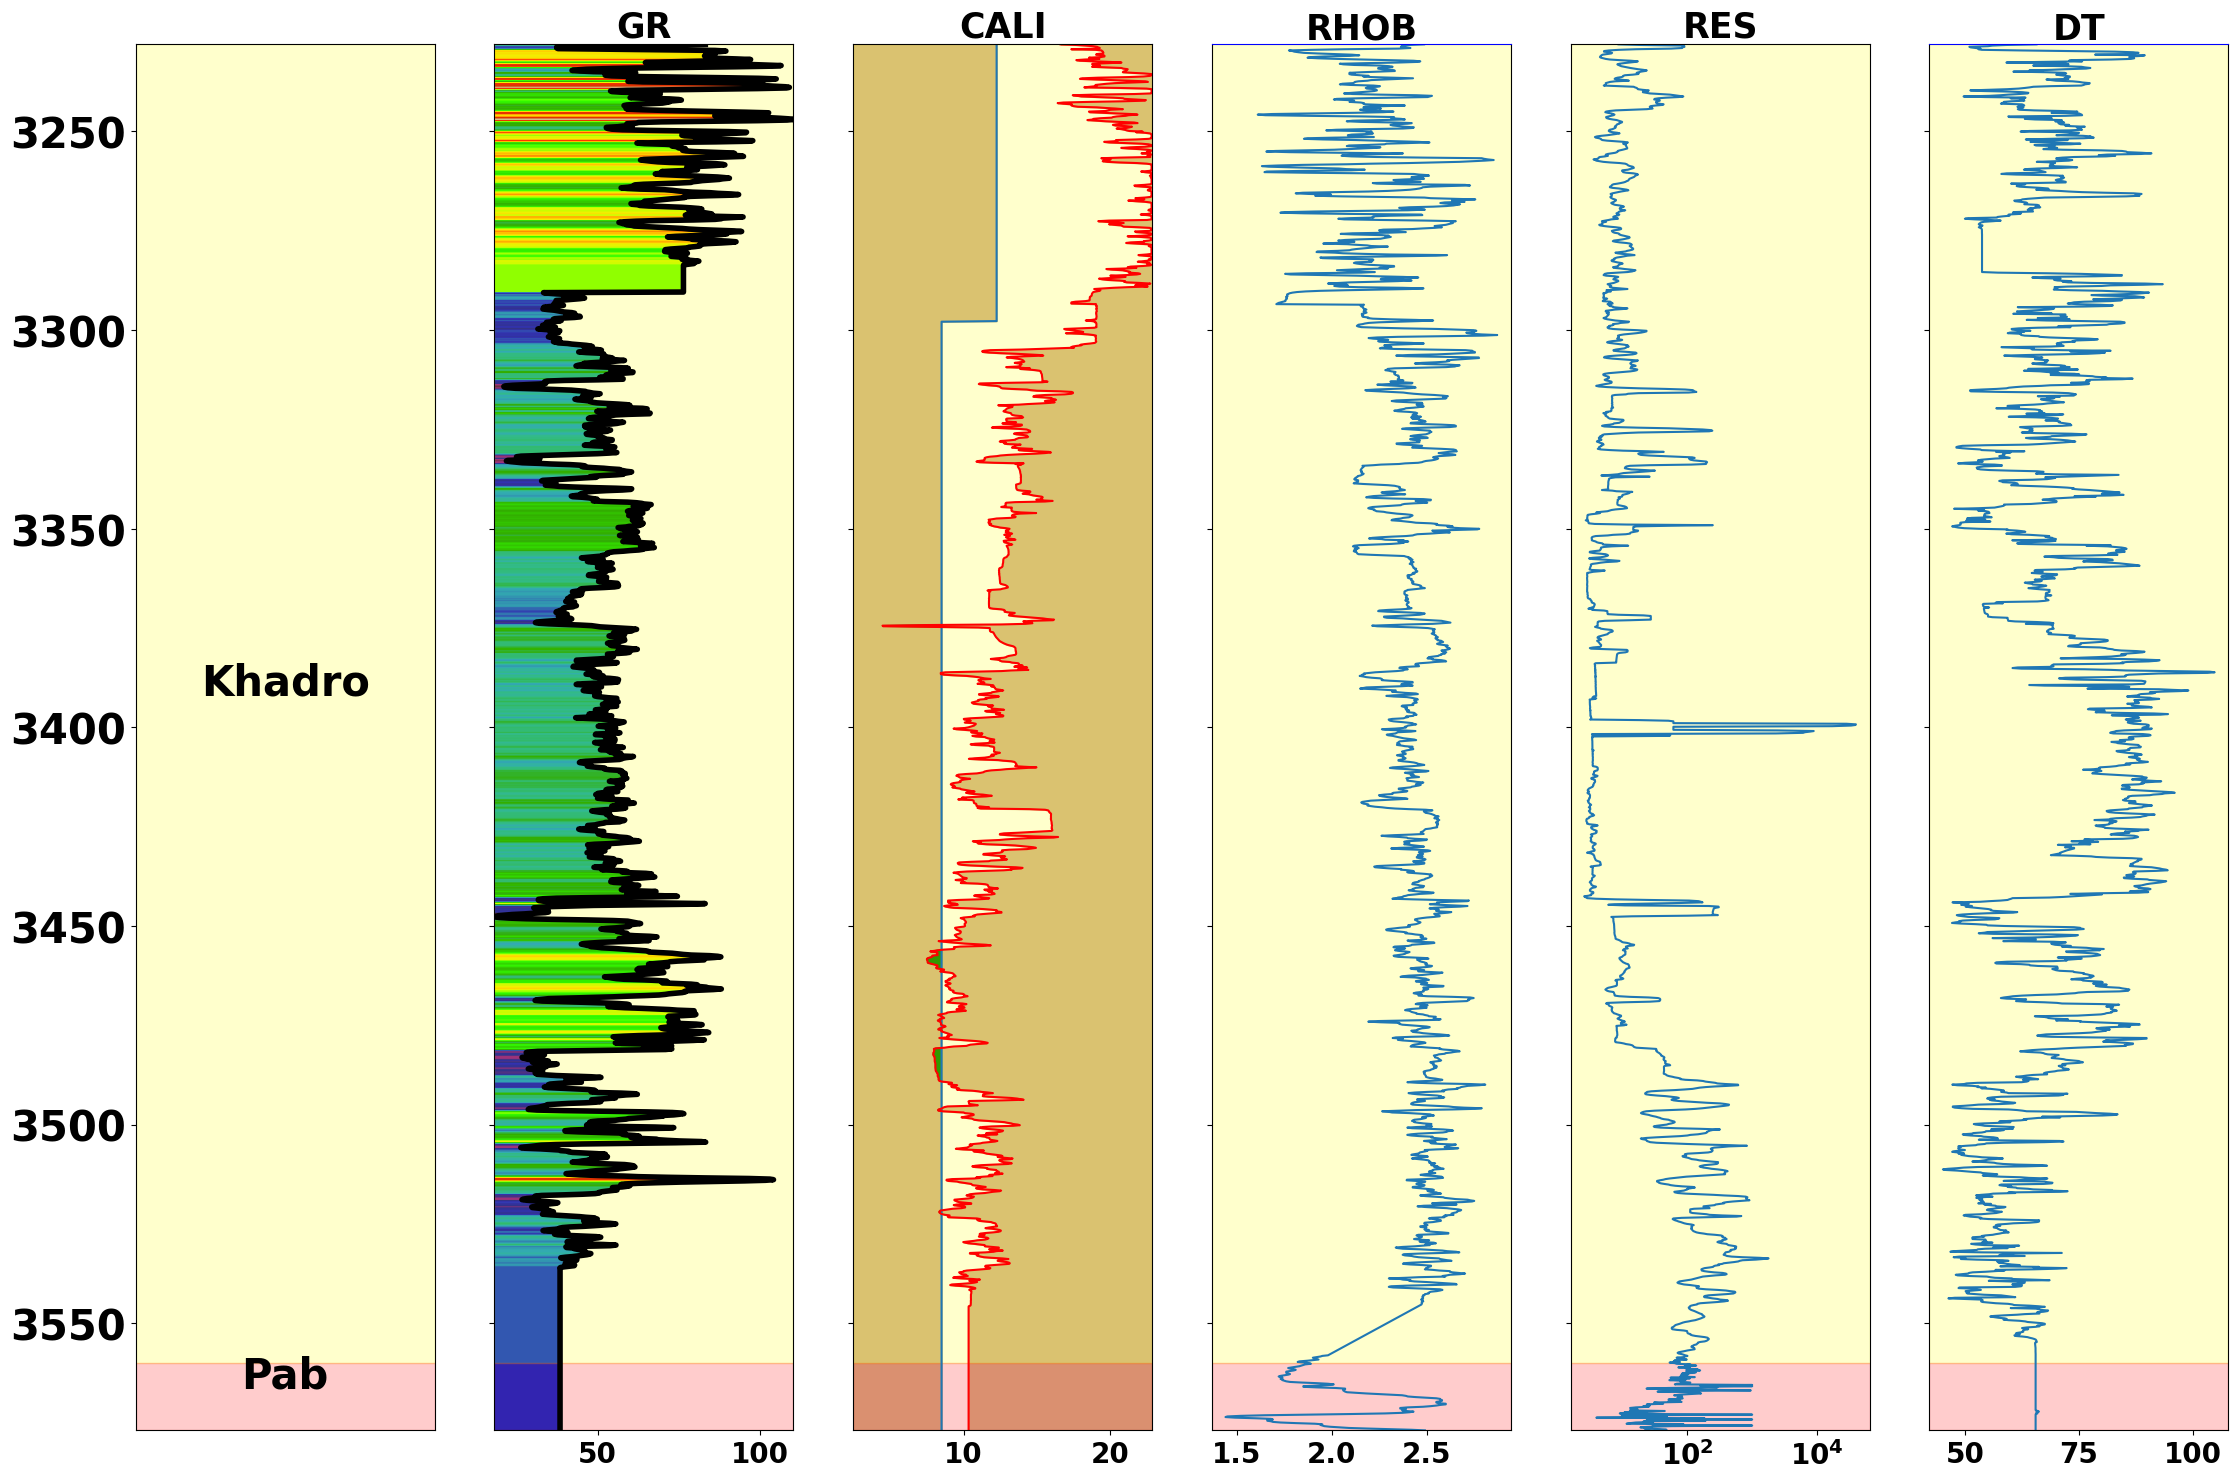

In [10]:
plotting = ["Formation","GR","CALI","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.2)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '30', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})  
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
        ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], a["CALI"].max(), a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
    
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['RHOB']
        x2=a['NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["RHOB"],a["DEPTH"],color="red",label="RHOB")
        ax[j].set_xlim([a["RHOB"].min(),a["RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["NPHI"],a["DEPTH"],color="blue",label="NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["NPHI"].max(),a["NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["NPHI"].max(),a["NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":15,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

# reservoir zone

In [11]:
reservoir=[]
for i in _3["Formation"].unique():
    b = _3[_3["Formation"]==i]
    reservoir.append(b)

In [12]:
def Volume_of_clay(_3):
    _3["Clay Volume-Linear"] = ((_3["GR"]-_3["GR"].min())/(_3["GR"].max()-_3["GR"].min()))
    _3["Clay Volume-Larionov"] = 0.33*(2**(2*_3["Clay Volume-Linear"])-1)
    _3["Clay Volume-Clavier"] = 1.7-np.sqrt(3.38-(_3["Clay Volume-Linear"]+0.7)**2)
    _3["Clay Volume-Larionov-Tertiary"]=0.083*(2**(3.7*_3["Clay Volume-Linear"])-1)
    w = 1
    _3["Clay Volume-Blend"] = w*_3["Clay Volume-Linear"] +(1-w)*_3["Clay Volume-Larionov-Tertiary"]
    return _3

In [13]:
reservoir = [Volume_of_clay(i) for i in reservoir]

# Porosities


In [14]:
def Porosities(_3):
    _3["Density Porosity"] = ((_3["RHOB"]-2.71)/(1-2.71))
    return _3

In [15]:
reservoir = [Porosities(i) for i in reservoir]

In [16]:
reservoir[0]

,DEPTH,GR,RES:1,RES:2,RHOB:1,RHOB:2,RES:3,DT,DPTM,P-IMP,...,CALI,RHOB,RES,SW,Clay Volume-Linear,Clay Volume-Larionov,Clay Volume-Clavier,Clay Volume-Larionov-Tertiary,Clay Volume-Blend,Density Porosity
0,3228.1367,83.1622,10.6895,6.6261,0.1871,2.4676,1.2386,65.6560,NaN,11455.5332,...,16.5980,2.4855,8.5903,NaN,0.705438,0.547465,0.514781,0.423761,0.705438,0.131287
1,3228.2893,62.8111,34.7267,11.9205,0.1678,2.4131,1.4626,58.9494,NaN,12477.0195,...,17.6836,2.4106,19.1217,NaN,0.484193,0.315695,0.293697,0.204328,0.484193,0.175088
2,3228.4417,45.5917,81.9959,20.0214,0.1575,2.3753,1.4324,55.9626,NaN,12937.0576,...,18.3453,2.3728,88.9430,NaN,0.296994,0.168106,0.155331,0.094776,0.296994,0.197193
3,3228.5940,39.5101,86.6740,20.8122,0.1668,2.3670,1.7532,55.0133,NaN,13114.3125,...,18.8337,2.3673,86.3576,NaN,0.230878,0.124482,0.114609,0.067049,0.230878,0.200409
4,3228.7463,37.4835,88.1799,22.7223,0.1661,2.3690,1.1226,50.8921,NaN,14188.2764,...,19.0969,2.3635,89.8995,NaN,0.208846,0.110811,0.101877,0.058806,0.208846,0.202632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3559.3020,38.4611,407.7583,160.9359,NaN,2.4075,0.5356,65.4647,NaN,11209.1865,...,10.3418,1.9000,63.7300,NaN,0.219474,0.117353,0.107968,0.062724,0.219474,0.473684
2174,3559.4543,38.4611,460.3275,165.6043,NaN,2.4075,0.7545,65.4647,NaN,11209.1865,...,10.3418,1.8700,63.5900,NaN,0.219474,0.117353,0.107968,0.062724,0.219474,0.491228
2175,3559.6067,38.4611,470.5951,147.7288,NaN,2.4075,0.5112,65.4647,NaN,11209.1865,...,10.3418,1.8300,61.0100,NaN,0.219474,0.117353,0.107968,0.062724,0.219474,0.514620
2176,3559.7593,38.4611,427.7162,136.7998,NaN,2.4075,0.5414,65.4647,NaN,11209.1865,...,10.3418,1.8200,76.4700,NaN,0.219474,0.117353,0.107968,0.062724,0.219474,0.520468


In [ ]:
Porosity = _3[_3["Clay Volume-Linear"]==_3["Clay Volume-Linear"].max()]["Average Porosity"].values[0]

# Effective Porosity

In [19]:
def effective_poro(_3):
    _3["Average Porosity"] = (_3["Density Porosity"])
    Porosity = _3[_3["Clay Volume-Linear"]==_3["Clay Volume-Linear"].max()]["Average Porosity"].values[0]
    _3["Clay Effect"] = (_3["Clay Volume-Linear"])*Porosity
    _3["Effective Porosity"] = _3["Average Porosity"] - _3["Clay Effect"]
    index = _3[_3["Effective Porosity"]<0].index
    _3.loc[index,"Effective Porosity"]=0
    return _3

In [1]:
reservoir = [effective_poro(i) for i in reservoir]

In [21]:
all_ = pd.concat(reservoir)
all_

,DEPTH,GR,RES:1,RES:2,RHOB:1,RHOB:2,RES:3,DT,DPTM,P-IMP,...,SW,Clay Volume-Linear,Clay Volume-Larionov,Clay Volume-Clavier,Clay Volume-Larionov-Tertiary,Clay Volume-Blend,Density Porosity,Average Porosity,Clay Effect,Effective Porosity
0,3228.1367,83.1622,10.6895,6.6261,0.1871,2.4676,1.2386,65.6560,NaN,11455.5332,...,NaN,0.705438,0.547465,0.514781,0.423761,0.705438,0.131287,0.131287,0.134240,0.000000
1,3228.2893,62.8111,34.7267,11.9205,0.1678,2.4131,1.4626,58.9494,NaN,12477.0195,...,NaN,0.484193,0.315695,0.293697,0.204328,0.484193,0.175088,0.175088,0.092138,0.082949
2,3228.4417,45.5917,81.9959,20.0214,0.1575,2.3753,1.4324,55.9626,NaN,12937.0576,...,NaN,0.296994,0.168106,0.155331,0.094776,0.296994,0.197193,0.197193,0.056516,0.140677
3,3228.5940,39.5101,86.6740,20.8122,0.1668,2.3670,1.7532,55.0133,NaN,13114.3125,...,NaN,0.230878,0.124482,0.114609,0.067049,0.230878,0.200409,0.200409,0.043934,0.156475
4,3228.7463,37.4835,88.1799,22.7223,0.1661,2.3690,1.1226,50.8921,NaN,14188.2764,...,NaN,0.208846,0.110811,0.101877,0.058806,0.208846,0.202632,0.202632,0.039742,0.162890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,3576.3708,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362573,0.362573,NaN,NaN
2286,3576.5232,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,NaN,0.304094,0.304094,NaN,NaN
2287,3576.6755,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,NaN,0.233918,0.233918,NaN,NaN
2288,3576.8279,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,NaN,0.169591,0.169591,NaN,NaN


In [22]:
a = all_

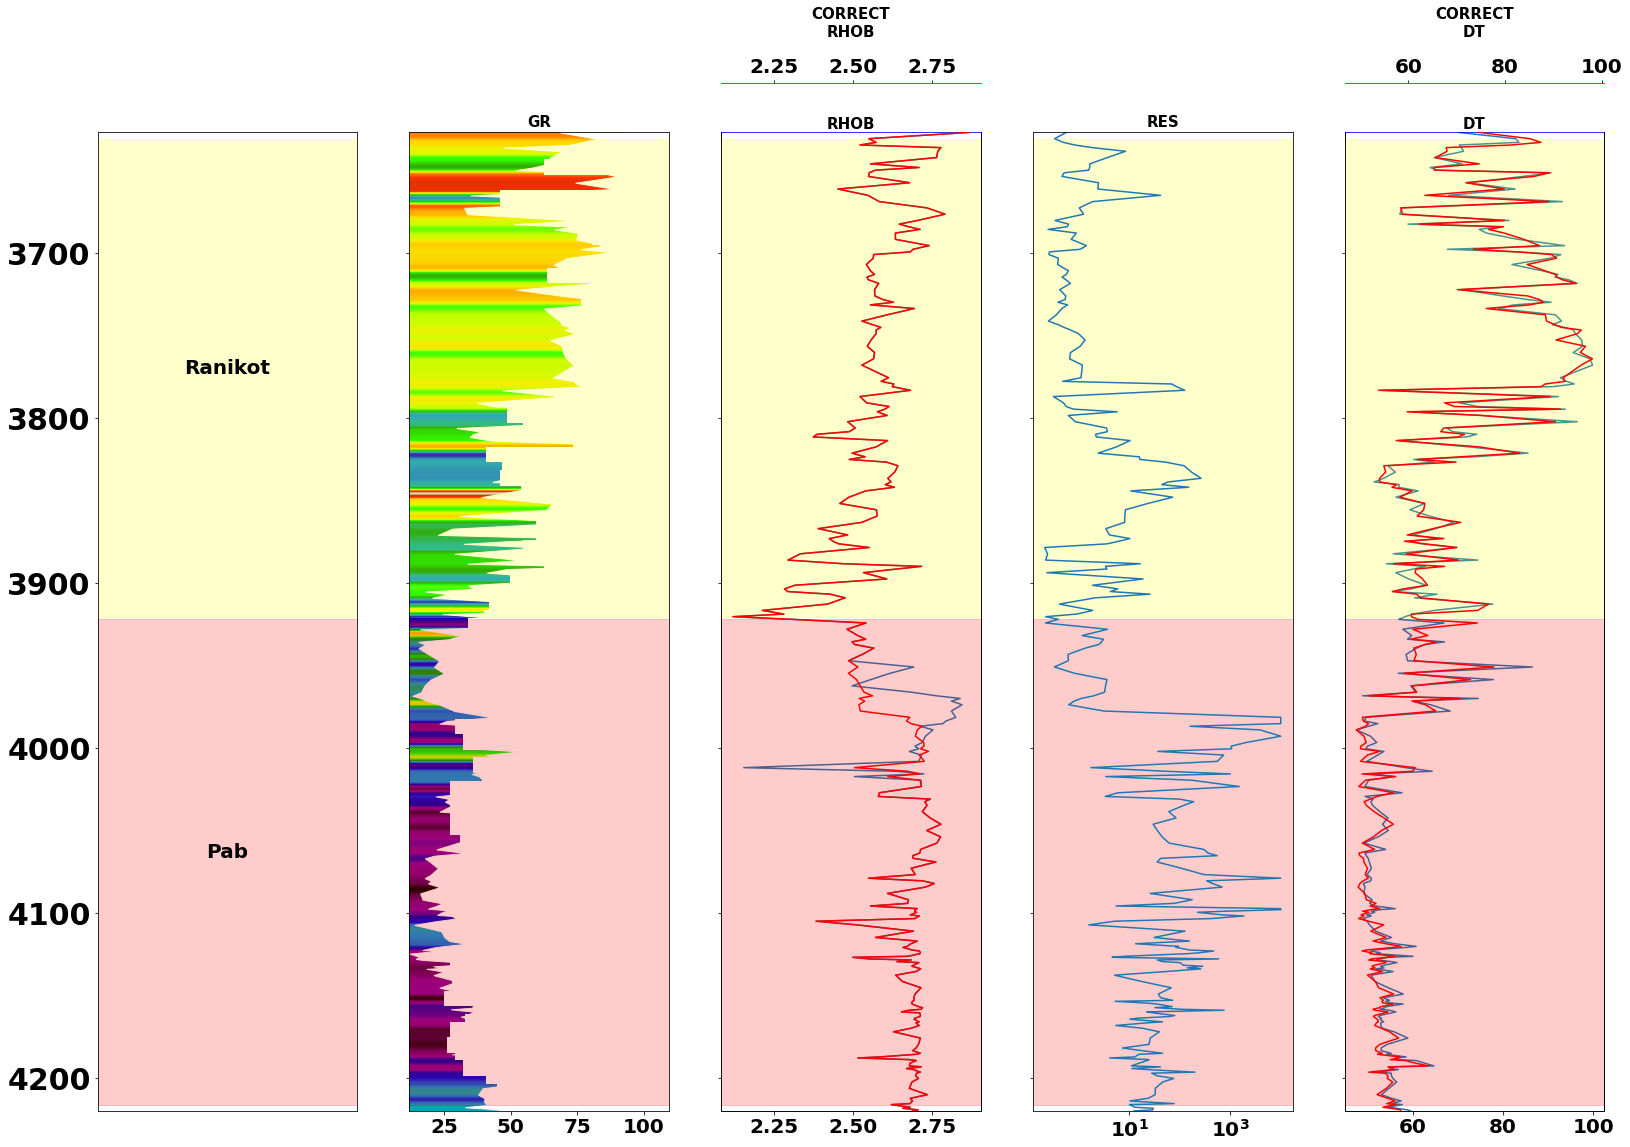

In [1312]:
plotting = ["Formation","GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.2)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '20', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nRHOB\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})  
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
#         ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], a["CALI"].max(), a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT DT"],a["DEPTH"],color="red",label="CORRECT DT")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nDT\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="red")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nNPHI\n",fontdict={"fontsize":15,"fontweight":'bold'})
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['CORRECT RHOB']
        x2=a['CORRECT NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].set_xlim([a["CORRECT RHOB"].min(),a["CORRECT RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="blue",label="CORRECT NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":15,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

In [1243]:
# plt.figure(figsize=(3,10))
# plt.plot(all_["VCL"],all_["DEPTH"])
# plt.plot(all_["Clay Volume-Linear"],all_["DEPTH"])

# Water Saturation

In [25]:
def indonesian(_3):
    Rsh = _3[_3["Clay Volume-Linear"]==_3["Clay Volume-Linear"].max()]["RES:3"].values[0]
    m=1.8
    a=0.81
    clay = _3["Clay Volume-Linear"]*100
    eff =_3["Effective Porosity"]*100
    first_term = math.sqrt(1/0.04)
    second_term_a = (clay**(1-0.5*clay))/(math.sqrt(Rsh))
    second_term_b = np.sqrt((eff**m)/(0.81*0.04))
    second_term = second_term_a+second_term_b
    _3["SWind"] = (first_term/second_term)**(2/2)
    f = _3[_3["SWind"]>1].index
    _3.loc[f,"SWind"]=1
    return _3

In [2]:
reservoir = [indonesian(i) for i in reservoir]

In [29]:
all_ = pd.concat(reservoir)
all_

,DEPTH,GR,RES:1,RES:2,RHOB:1,RHOB:2,RES:3,DT,DPTM,P-IMP,...,Clay Volume-Linear,Clay Volume-Larionov,Clay Volume-Clavier,Clay Volume-Larionov-Tertiary,Clay Volume-Blend,Density Porosity,Average Porosity,Clay Effect,Effective Porosity,SWind
0,3228.1367,83.1622,10.6895,6.6261,0.1871,2.4676,1.2386,65.6560,NaN,11455.5332,...,0.705438,0.547465,0.514781,0.423761,0.705438,0.131287,0.131287,0.134240,0.000000,1.000000
1,3228.2893,62.8111,34.7267,11.9205,0.1678,2.4131,1.4626,58.9494,NaN,12477.0195,...,0.484193,0.315695,0.293697,0.204328,0.484193,0.175088,0.175088,0.092138,0.082949,0.134063
2,3228.4417,45.5917,81.9959,20.0214,0.1575,2.3753,1.4324,55.9626,NaN,12937.0576,...,0.296994,0.168106,0.155331,0.094776,0.296994,0.197193,0.197193,0.056516,0.140677,0.083338
3,3228.5940,39.5101,86.6740,20.8122,0.1668,2.3670,1.7532,55.0133,NaN,13114.3125,...,0.230878,0.124482,0.114609,0.067049,0.230878,0.200409,0.200409,0.043934,0.156475,0.075725
4,3228.7463,37.4835,88.1799,22.7223,0.1661,2.3690,1.1226,50.8921,NaN,14188.2764,...,0.208846,0.110811,0.101877,0.058806,0.208846,0.202632,0.202632,0.039742,0.162890,0.073036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,3576.3708,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,0.362573,0.362573,NaN,NaN,NaN
2286,3576.5232,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,0.304094,0.304094,NaN,NaN,NaN
2287,3576.6755,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,0.233918,0.233918,NaN,NaN,NaN
2288,3576.8279,38.4611,191.8428,128.6089,NaN,2.4075,0.1567,65.4647,NaN,11209.1865,...,NaN,NaN,NaN,NaN,NaN,0.169591,0.169591,NaN,NaN,NaN


In [30]:
a = all_.copy()

In [31]:
a.isnull().sum()

DEPTH                               0
GR                                  0
RES:1                               0
RES:2                               0
RHOB:1                           1860
RHOB:2                              0
RES:3                               0
DT                                  0
DPTM                             2235
P-IMP                               0
S-IMP                             150
PHIE                              112
SDT:1                            2290
RHOB:3                           2290
UNKNOWN:1                        2290
SDT:2                            2290
RHOB:4                           2290
UNKNOWN:2                        2290
Formation                           0
BS                                  0
CALI                                0
RHOB                                0
RES                                 0
SW                               2290
Clay Volume-Linear                112
Clay Volume-Larionov              112
Clay Volume-

In [3]:
plotting = ["Formation","GR","RHOB","RES:3","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.2)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '20', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nRHOB\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="RES:3":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})  
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
#         ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], a["CALI"].max(), a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT DT"],a["DEPTH"],color="red",label="CORRECT DT")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nDT\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="red")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nNPHI\n",fontdict={"fontsize":15,"fontweight":'bold'})
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['CORRECT RHOB']
        x2=a['CORRECT NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].set_xlim([a["CORRECT RHOB"].min(),a["CORRECT RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="blue",label="CORRECT NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":15,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

In [1320]:
min1 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].max()

min3 = a[a["Formation"]=="Pab Formation"]["DEPTH"].min()
min4 = a[a["Formation"]=="Pab Formation"]["DEPTH"].max()
tops = [(min1+min2)/2,(min3+min4)/2]
forms = ["Ranikot","Pab"]
m = int(a["GR"].max())
d = []
for i in a["GR"]:
    z = np.nan*(np.ones(m))
    z[:int(i)+1] = i
    z = z.reshape(1,-1)
    d.append(z)
gr = pd.DataFrame(np.concatenate(d))
gr["data"] = a["GR"]

In [1321]:
tops = [(min1+min2)/2,(min3+min4)/2]
forms = ["Ranikot","Pab"]
m = int(a["GR"].max())
d = []
for i in a["GR"]:
    z = np.nan*(np.ones(m))
    z[:int(i)+1] = i
    z = z.reshape(1,-1)
    d.append(z)
gr = pd.DataFrame(np.concatenate(d))
gr["data"] = a["GR"]

In [1322]:
m = int(a["GR"].max())
d = []
for i in a["GR"]:
    z = np.nan*(np.ones(m))
    z[:int(i)+1] = i
    z = z.reshape(1,-1)
    d.append(z)
gr = pd.DataFrame(np.concatenate(d))
gr["data"] = a["GR"]

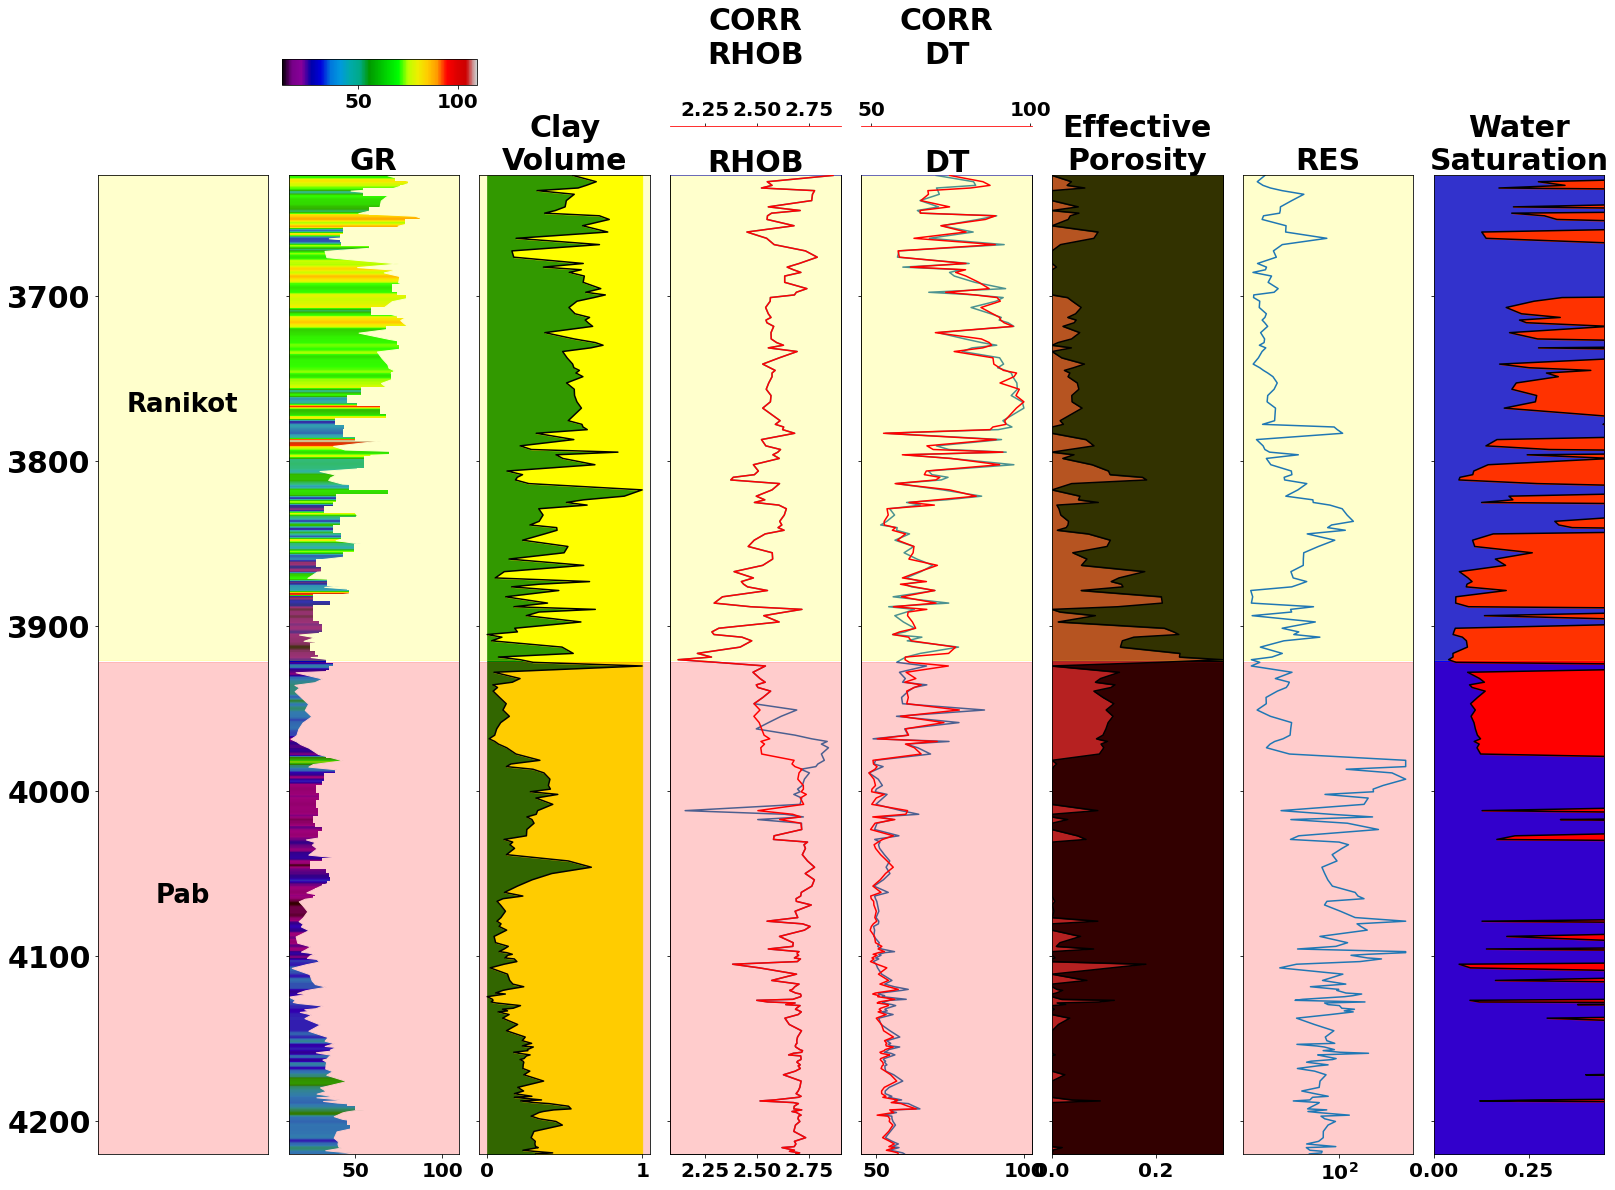

In [1323]:
plotting = ["Formation","GR","Clay Volume-Linear","RHOB","DT","Effective Porosity","RES","SWind"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.12)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '26', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    elif i=="Clay Volume-Linear":
        ax[j].fill_betweenx(a['DEPTH'],a["Clay Volume-Linear"],0, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'],1,a["Clay Volume-Linear"], interpolate=True, color='yellow')
        ax[j].plot(a["Clay Volume-Linear"],a["DEPTH"],color="black")
        
        ax[j].set_title("Clay\nVolume",fontdict={"fontsize":30,"fontweight":'bold'})
        
    elif i=="Effective Porosity":
        ax[j].fill_betweenx(a['DEPTH'],a["Effective Porosity"],0, interpolate=True, color='brown')
        ax[j].fill_betweenx(a['DEPTH'],1,a["Effective Porosity"], interpolate=True, color='black')
        ax[j].plot(a["Effective Porosity"],a["DEPTH"],color="black")
        ax[j].set_xlim([0,a["Effective Porosity"].max()])
        ax[j].set_title("Effective\nPorosity",fontdict={"fontsize":30,"fontweight":'bold'})
    elif i=="SWind":
        ax[j].fill_betweenx(a['DEPTH'],a["SWind"],0, interpolate=True, color='blue')
        ax[j].fill_betweenx(a['DEPTH'],1,a["SWind"], interpolate=True, color='red')
        ax[j].plot(a["SWind"],a["DEPTH"],color="black")
        ax[j].set_xlim([0,0.45])
        ax[j].set_title("Water\nSaturation",fontdict={"fontsize":30,"fontweight":'bold'})
    elif i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":30,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORR\nRHOB\n",fontdict={"fontsize":30,"fontweight":'bold'})
    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":30,"fontweight":'bold'})  
    elif i=="GR":
        cbaxes = fig.add_axes([0.22, 0.95, 0.1, 0.02])
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        fig.colorbar(a0,orientation="horizontal",cax=cbaxes)
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
        
#         ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":30,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], 12, a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":30,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":30,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT DT"],a["DEPTH"],color="red",label="CORR DT")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORR\nDT\n",fontdict={"fontsize":30,"fontweight":'bold'})
    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":30,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="red")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORR\nNPHI\n",fontdict={"fontsize":30,"fontweight":'bold'})
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['CORRECT RHOB']
        x2=a['CORRECT NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORR RHOB")
        ax[j].set_xlim([a["CORRECT RHOB"].min(),a["CORRECT RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="blue",label="CORR NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":30,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

In [1325]:
all_.to_csv(r"C:\work\Global_Petrophysics_ML\Petrodone\M_2.csv",index=False)

In [700]:
all_#

,DEPTH,GR,BS,RHOB,RES,DT,Formation,VCL,SW,NPHI,...,Clay Volume-Blend,NPHI measured,True Neutron Porosity,Density Porosity,Sonic Porosity,Neutron Porosity,Average Porosity,Clay Effect,Effective Porosity,SWind
0,3393.5225,61.5145,8.5,2.5348,1.018505,102.316350,Khadro Sand,0.6814,1.0,35.159999,...,0.569229,0.3516,39.936630,0.102456,0.350684,0.399366,0.102456,0.044406,0.058050,0.184851
1,3393.6748,61.8319,8.5,2.5423,1.077368,102.571658,Khadro Sand,0.6821,1.0,35.190001,...,0.572810,0.3519,39.965468,0.098070,0.352597,0.399655,0.098070,0.044686,0.053384,0.199329
2,3393.8271,62.0807,8.5,2.5414,1.140444,102.248150,Khadro Sand,0.6749,1.0,34.750000,...,0.575617,0.3475,39.542819,0.098597,0.350173,0.395428,0.098597,0.044905,0.053692,0.198302
3,3393.9797,62.2845,8.5,2.5412,1.221759,101.110872,Khadro Sand,0.6557,1.0,33.570001,...,0.577917,0.3357,38.411887,0.098713,0.341654,0.384119,0.098713,0.045084,0.053629,0.198509
4,3394.1321,59.4045,8.5,2.5526,1.307448,99.890013,Khadro Sand,0.6384,1.0,32.609999,...,0.545421,0.3261,37.493775,0.092047,0.332509,0.374938,0.092047,0.042549,0.049498,0.213362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,3655.9553,133.1726,6.0,2.4998,15.623536,64.788019,Pab Formation,0.5243,1.0,14.790000,...,0.742651,0.1479,19.826033,0.122924,0.069573,0.198260,0.122924,0.040868,0.082056,0.135376
1723,3656.1077,120.8443,6.0,2.4226,14.385987,64.023397,Pab Formation,0.4803,1.0,13.180000,...,0.668703,0.1318,18.080993,0.168070,0.063846,0.180810,0.168070,0.036798,0.131272,0.088693
1724,3656.2600,111.2576,6.0,2.4372,16.071511,62.985776,Pab Formation,0.4394,1.0,12.360000,...,0.611201,0.1236,17.177022,0.159532,0.056073,0.171770,0.159532,0.033634,0.125898,0.092093
1725,3656.4124,114.5726,6.0,2.4736,15.768895,63.520789,Pab Formation,0.4620,1.0,12.220000,...,0.631085,0.1222,17.021612,0.138246,0.060081,0.170216,0.138246,0.034728,0.103518,0.109832
